# (5주차) 10월12일 (2) 
> 손실함수의 비교, Adam, universal approximation theorem, MNIST with MLP

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-wKaUL2DcoyMXkPihnG-iOP

`-` (1/8) 손실함수 (1) 

`-` (2/8) 손실함수 (2) 

`-` (3/8) 손실함수차이를 애니메이션으로 

`-` (4/8) Adam

`-` (5/8) Adam animation 

`-` (6/8) 신경망은 왜 깊어졌는가?,universal approximation theorem

`-` (7/8) MNIST with MLP 풀이1 

`-` (8/8) MNIST with MLP 풀이2,3

## 모형의 표현력: 왜 신경망은 깊어졌는가? 

### 넓은 신경망 (하나의 은닉층 + 충분히 큰 노드를 가진 신경망) 

`-` (universal approximation theorem) 하나의 은닉층과 충분히 큰 노드를 가진 신경망은 거의 모든 함수를 근사할 수 있다. 

`-` 핵심아이디어: (node1=선형+비선형) + (node2=선형+비선형) $\to$ locally compact basis $\to$ 구불구불하게 다 맞출수가 있다. 
- 선형변환을 무한번 선형변환해도 결과는 그냥 선형변환이다 $\to$ 모든 range에 값이 있는 basis $\to$ 표현력이 약하다. (한쪽을 맞추면 다른쪽을 맞추기 힘듬)
- 하지만 아주 단순한 비선형변환을 섞기만 해도 표현력이 비약적으로 상승한다. 

`-` 트릭은 비선형변환 

### 그렇다면 왜 넓은 신경망을 쓰지 않는가? 

`-` 안전한 대답 (그리고 쓸모없는 대답): 실험적으로 깊은 신경망이 더 효과적임이 입증되었다. 

`-` 좀 더 고민을 해본 대답 
- 넓은신경망보다 깊은신경망이 파라메터수 대비 복잡도를 더 쉽게 올릴수 있다. 
- 넓은신경망보다 깊은신경망이 오퍼피팅 이슈를 피하기 쉽다. 

`-` 내 생각 
- 깊은 신경망은 계층적인 모형이다. 
- 즉 깊은 신경망은 여러스케일로 자료를 관찰한다. 

## Pytoch MLP (MNIST 3,7)

In [59]:
import torch 
from fastai.vision.all import * 

In [60]:
import graphviz

In [61]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

### data 

`-` download data 

In [62]:
path = untar_data(URLs.MNIST_SAMPLE)

In [63]:
path.ls()

(#3) [Path('/home/cgb2/.fastai/data/mnist_sample/labels.csv'),Path('/home/cgb2/.fastai/data/mnist_sample/valid'),Path('/home/cgb2/.fastai/data/mnist_sample/train')]

`-` list 

In [64]:
threes=(path/'train'/'3').ls()
sevens=(path/'train'/'7').ls()

`-` list $\to$ image 

In [65]:
Image.open(threes[4])

`-` image $\to$ tensor 

In [66]:
tensor(Image.open(threes[4]))

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 114, 255, 228,  44,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  3

- 여기에서 tensor는 파이토치가 아니라 fastai에서 구현한 함수임 

`-` 여러개의 리스트를 모두 텐서로 바꿔보자. 

In [67]:
seven_tensor = torch.stack([tensor(Image.open(i)) for i in sevens]).float()/255
three_tensor = torch.stack([tensor(Image.open(i)) for i in threes]).float()/255

`-` $X$와 $y$를 만들자. 

In [68]:
seven_tensor.shape, three_tensor.shape

(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

In [69]:
y=torch.tensor([0.0]*6265+ [1.0]*6131).reshape(12396,1)

In [70]:
X=torch.vstack([seven_tensor,three_tensor]).reshape(12396,-1)

In [71]:
X.shape, y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

### 모형 

${\bf X} \to {\bf WX+b} \to f({\bf WX+b}) \to \dots \to {\bf y}$
- ${\bf X}=12396 \times 784$ matrix 
- ${\bf y}=12396 \times 1$ (col) vector

`-` 모델을 어떻게 구성할것인가? 
- 아키텍처: 적당히 깊게... + 적당히 넓게... + 표현력이 충분하면서도 + 과적합은 일어나지 않도록.. (저도 잘 몰라요) 
- 손실함수: BCEloss 
- 옵티마이저: Adam 

`-` 교재의 모형 

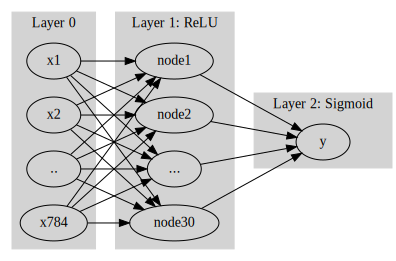

In [72]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: ReLU"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "y"
    "node2" -> "y"
    "..." -> "y"
    "node30" -> "y"
    label = "Layer 2: Sigmoid"
}
''')

### 풀이1

`-` 그럼 이제 풀어보자. (아키텍처만 만들어주면 금방구현한다.) 

In [73]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=28*28, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30, out_features=1),
    torch.nn.Sigmoid()    
)
optimizer=torch.optim.Adam(net.parameters())

In [74]:
for epoc in range(200): 
    ## 1 
    yhat=net(X)
    ## 2 
    loss= -torch.mean(y*torch.log(yhat)+(1-y)*torch.log(1-yhat)) ## BCEloss
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad()

In [75]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0184, -0.0158, -0.0069,  ...,  0.0068, -0.0041,  0.0025],
         [-0.0274, -0.0224, -0.0309,  ..., -0.0029,  0.0013, -0.0167],
         [ 0.0282, -0.0095, -0.0340,  ..., -0.0141,  0.0056, -0.0335],
         ...,
         [ 0.0267,  0.0186, -0.0326,  ...,  0.0047, -0.0072, -0.0301],
         [-0.0190,  0.0291,  0.0221,  ...,  0.0067,  0.0206,  0.0151],
         [ 0.0226,  0.0331,  0.0182,  ...,  0.0150,  0.0278, -0.0073]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0098,  0.0315,  0.0363, -0.0093,  0.1433,  0.0175,  0.0139, -0.0237,
          0.0323,  0.0351, -0.0125,  0.0443,  0.0176,  0.0745,  0.0098,  0.0042,
          0.0361,  0.0394,  0.0534,  0.0175,  0.0567,  0.0148,  0.0459,  0.0648,
          0.0009, -0.0279,  0.0972,  0.0478,  0.0612,  0.0504],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.2154,  0.1926,  0.2019,  0.1671, -0.1840, -0.0726, -0.1608,  0.1046,
          -0.2522, -0.2444,  0.1257, -0.181

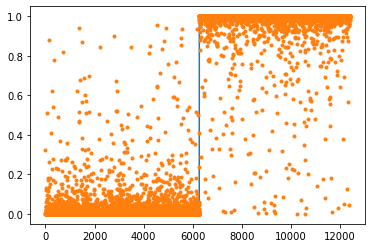

In [76]:
plt.plot(y)
plt.plot(yhat.data,'.')

In [77]:
ypred=yhat>0.5 

In [78]:
sum(ypred==y)/12396

tensor([0.9893])

### 풀이2: torch에 내장된 손실함수 이용 

In [79]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=28*28, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30, out_features=1),
    #torch.nn.Sigmoid()    
)
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(net.parameters())

In [80]:
for epoc in range(200): 
    ## 1 
    yhat=net(X)
    ## 2 
    loss= loss_fn(yhat,y) ## BCEloss
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad()

In [81]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0184, -0.0158, -0.0069,  ...,  0.0068, -0.0041,  0.0025],
         [-0.0274, -0.0224, -0.0309,  ..., -0.0029,  0.0013, -0.0167],
         [ 0.0282, -0.0095, -0.0340,  ..., -0.0141,  0.0056, -0.0335],
         ...,
         [ 0.0267,  0.0186, -0.0326,  ...,  0.0047, -0.0072, -0.0301],
         [-0.0190,  0.0291,  0.0221,  ...,  0.0067,  0.0206,  0.0151],
         [ 0.0226,  0.0331,  0.0182,  ...,  0.0150,  0.0278, -0.0073]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0098,  0.0315,  0.0363, -0.0093,  0.1433,  0.0175,  0.0139, -0.0237,
          0.0323,  0.0351, -0.0125,  0.0443,  0.0176,  0.0745,  0.0098,  0.0042,
          0.0361,  0.0394,  0.0534,  0.0175,  0.0567,  0.0148,  0.0459,  0.0648,
          0.0009, -0.0279,  0.0972,  0.0478,  0.0612,  0.0504],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.2154,  0.1926,  0.2019,  0.1671, -0.1840, -0.0726, -0.1608,  0.1046,
          -0.2522, -0.2444,  0.1257, -0.181

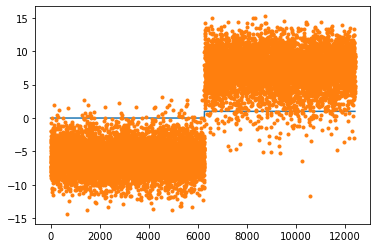

In [82]:
plt.plot(y)
plt.plot(yhat.data,'.')

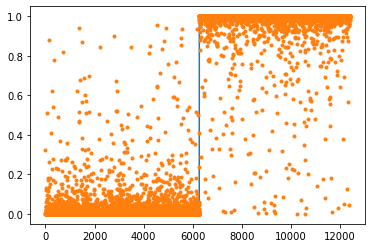

In [83]:
f=torch.nn.Sigmoid()
plt.plot(y)
plt.plot(f(yhat.data),'.')

### 풀이3: torch에 내장된 손실함수 이용 + GPU

In [84]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=28*28, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30, out_features=1),
    #torch.nn.Sigmoid()    
)

In [85]:
net.to("cuda:0")

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [86]:
X_gpu=X.to("cuda:0")
y_gpu=y.to("cuda:0")

In [87]:
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(net.parameters())

In [88]:
for epoc in range(200): 
    ## 1 
    yhat_gpu=net(X_gpu)
    ## 2 
    loss= loss_fn(yhat_gpu,y_gpu) ## BCEloss
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad()

In [89]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0184, -0.0158, -0.0069,  ...,  0.0068, -0.0041,  0.0025],
         [-0.0274, -0.0224, -0.0309,  ..., -0.0029,  0.0013, -0.0167],
         [ 0.0282, -0.0095, -0.0340,  ..., -0.0141,  0.0056, -0.0335],
         ...,
         [ 0.0267,  0.0186, -0.0326,  ...,  0.0047, -0.0072, -0.0301],
         [-0.0190,  0.0291,  0.0221,  ...,  0.0067,  0.0206,  0.0151],
         [ 0.0226,  0.0331,  0.0182,  ...,  0.0150,  0.0278, -0.0073]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.0098,  0.0315,  0.0363, -0.0093,  0.1433,  0.0175,  0.0139, -0.0237,
          0.0323,  0.0351, -0.0125,  0.0443,  0.0176,  0.0745,  0.0098,  0.0042,
          0.0361,  0.0394,  0.0534,  0.0175,  0.0567,  0.0148,  0.0459,  0.0648,
          0.0009, -0.0279,  0.0972,  0.0478,  0.0612,  0.0504], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.2154,  0.1926,  0.2019,  0.1671, -0.1840, -0.0726, -0.1608,  0.1046,
         